<a href="https://colab.research.google.com/github/Pappas313/Computational-vision/blob/main/%CE%A5%CF%80%CE%BF%CE%BB%CE%BF%CF%83%CF%84%CE%B9%CE%BA%CE%AE_%CE%8C%CF%81%CE%B1%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Άσκηση 4, Φιλτράρισμα στο πεδίο του χώρου:**

Θεωρήστε την εικόνα αποχρώσεων του
γκρι (grayscale image) “lenna.bmp”. Προσθέστε στην εικόνα κρουστικό θόρυβο (“salt &
pepper”) με πυκνότητα 0.05 (δηλαδή ποσοστό κάλυψης της επιφάνειας της εικόνας ίσο με
5%).2

**Ζητούμενα:**

**Α.** Τυπώστε την εικόνα πριν και μετά την προσθήκη του θορύβου.

**Β.** Θεωρήστε διαδοχικά φίλτρα μέσης τιμής διαστάσεων 3x3, 5x5 και 7x7 στο πεδίο του
χώρου. Εφαρμόστε ξεχωριστά το κάθε φίλτρο στην εικόνα με θόρυβο (χρήση τελεστή
συνέλιξης).

**Γ.** Τυπώστε σε ένα ενιαίο σχήμα την προκύπτουσα φιλτραρισμένη εικόνα για κάθε
περίπτωση χρησιμοποιούμενου φίλτρου και συγκρίνετε με την αρχική εικόνα. Τι
παρατηρείτε?

**Σημείωση**

Φαίνεται πως όσο μεγαλύτερο είναι το παράθυρο, τόσο περισσότερο ο θόρυβος απομακρύνεται. Ωστόσο, υπάρχει αλλοίωση της πληροφορίας της εικόνας. Αυτό οφείλεται στη φύση του συγκεκριμένου φίλτρου (μέσης τιμής) του αποκόπτει πληροφορία από τις υψηλές συχνότητες με αποτέλεσμα να αλλοιώνει τις ακμές καθώς αυτές βρίσκονται σε αυτό το εύρος συχνοτήτων.
Ουσιαστικά για κάθε ένα παράθυρο εφαρμόζεται η παρακάτω φόρμουλα:



**Κώδικας**

import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

**Create a random array with the same dimensions as the image**

**Create a mask for the positions where the noise will be added**

**Add salt & pepper noise**

**Convert the numpy array back to a PIL image**


In [ ]:
def noise_image(image):
    original_image_array = np.array(image)


    noise = np.random.rand(*original_image_array.shape)

    noise_density = 0.05


    salt_and_pepper = noise < noise_density / 2


    original_image_array[salt_and_pepper] = 0  # Salt
    original_image_array[noise > 1 - noise_density / 2] = 255  # Pepper


    noisy_image = Image.fromarray(original_image_array)

    return noisy_image

def filter_image(noisy_image, filter_size):

    filtered_image = noisy_image.filter(ImageFilter.BoxBlur(filter_size))

    return filtered_image

**Import Image**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
image_path_source = '/content/drive/My Drive/Υπολογιστική όραση/Dataset_01/lenna.bmp'

image = Image.open(image_path_source).convert('L')

noisy_image = noise_image(image)

Mounted at /content/drive


**Display the images using matplotlib**

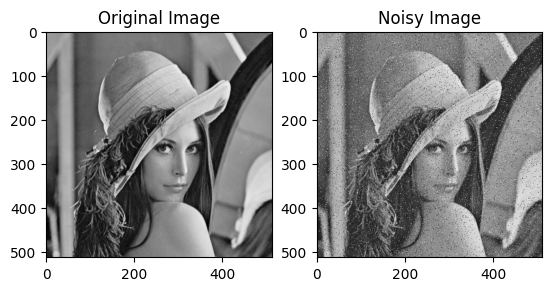

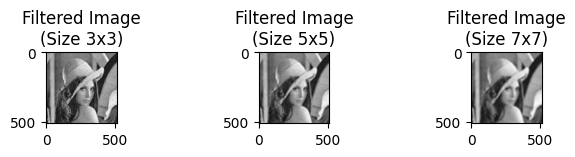

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.show()

filter_sizes = [3, 5, 7]

for i, filter_size in enumerate(filter_sizes):
    filtered = filter_image(noisy_image, filter_size)
    plt.subplot(1, len(filter_sizes), i + 1)
    plt.imshow(filtered, cmap='gray')
    plt.subplots_adjust(wspace=2, hspace=0.5)
    plt.title(f'Filtered Image\n(Size {filter_size}x{filter_size})')

plt.show()